In [1]:
#pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

pd.set_option("display.max_columns", 500)
pal = sns.color_palette()

In [3]:
df = pd.read_csv("C:/Users/cj.alonzo/OneDrive - Nice Systems Ltd/Documents/Personal/Data Science/personal projects/delays/all_years - WORK.csv")

In [4]:
# Load the airline codes spreadsheet
airline_codes_df = pd.read_csv("C:/Users/cj.alonzo/OneDrive - Nice Systems Ltd/Documents/Personal/Data Science/personal projects/delays/airline.csv")

# Merge the main DataFrame with the airline codes DataFrame
df_merged = pd.merge(df, airline_codes_df, left_on='OP_UNIQUE_CARRIER', right_on='Code', how='left')

# Drop the redundant 'Code' column
df_merged = df_merged.drop(columns=['Code'])

# Display the resulting DataFrame
print(df_merged)

          YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER ORIGIN  \
0         2018     12             1            6                9E    AEX   
1         2018     12             1            6                9E    AEX   
2         2018     12             1            6                9E    AGS   
3         2018     12             1            6                9E    AGS   
4         2018     12             1            6                9E    AGS   
...        ...    ...           ...          ...               ...    ...   
40360859  2023     10            31            2                ZW    SCE   
40360860  2023     10            31            2                ZW    SCE   
40360861  2023     10            31            2                ZW    SPI   
40360862  2023     10            31            2                ZW    STL   
40360863  2023     10            31            2                ZW    TVC   

           ORIGIN_CITY_NAME DEST    DEST_CITY_NAME DEST_STATE_NM  DEP_DELAY

In [5]:
print('Dataframe dimensions:', df_merged.shape)

Dataframe dimensions: (40360864, 23)


In [6]:
print('datatypes\n', df_merged.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40360864 entries, 0 to 40360863
Data columns (total 23 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY_OF_MONTH         int64  
 3   DAY_OF_WEEK          int64  
 4   OP_UNIQUE_CARRIER    object 
 5   ORIGIN               object 
 6   ORIGIN_CITY_NAME     object 
 7   DEST                 object 
 8   DEST_CITY_NAME       object 
 9   DEST_STATE_NM        object 
 10  DEP_DELAY            float64
 11  DEP_DEL15            float64
 12  ARR_DELAY            float64
 13  ARR_DEL15            float64
 14  CANCELLED            float64
 15  CANCELLATION_CODE    object 
 16  DIVERTED             float64
 17  CARRIER_DELAY        float64
 18  WEATHER_DELAY        float64
 19  NAS_DELAY            float64
 20  SECURITY_DELAY       float64
 21  LATE_AIRCRAFT_DELAY  float64
 22  Description          object 
dtypes: float64(11), int64(4), obje

In [7]:
df_merged.isnull().sum().sort_values(ascending = False)

CANCELLATION_CODE      39380023
LATE_AIRCRAFT_DELAY    33098801
SECURITY_DELAY         33098801
NAS_DELAY              33098801
WEATHER_DELAY          33098801
CARRIER_DELAY          33098801
ARR_DELAY               1077505
ARR_DEL15               1077505
DEP_DEL15                959152
DEP_DELAY                959152
DIVERTED                      0
CANCELLED                     0
YEAR                          0
MONTH                         0
DEST_STATE_NM                 0
DEST_CITY_NAME                0
DEST                          0
ORIGIN_CITY_NAME              0
ORIGIN                        0
OP_UNIQUE_CARRIER             0
DAY_OF_WEEK                   0
DAY_OF_MONTH                  0
Description                   0
dtype: int64

In [8]:
# Assuming df is your DataFrame
dataframe = [df_merged]
columns_to_fill = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

for df in dataframe:
    df_merged[columns_to_fill] = df_merged[columns_to_fill].fillna(0)

In [9]:
df_merged.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_NM,DEP_DELAY,DEP_DEL15,ARR_DELAY,ARR_DEL15,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Description
0,2018,12,1,6,9E,AEX,"Alexandria, LA",ATL,"Atlanta, GA",Georgia,-5.0,0.0,-14.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Endeavor Air
1,2018,12,1,6,9E,AEX,"Alexandria, LA",ATL,"Atlanta, GA",Georgia,0.0,0.0,9.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Endeavor Air
2,2018,12,1,6,9E,AGS,"Augusta, GA",ATL,"Atlanta, GA",Georgia,-10.0,0.0,-20.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Endeavor Air
3,2018,12,1,6,9E,AGS,"Augusta, GA",ATL,"Atlanta, GA",Georgia,-10.0,0.0,-1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Endeavor Air
4,2018,12,1,6,9E,AGS,"Augusta, GA",ATL,"Atlanta, GA",Georgia,1.0,0.0,3.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Endeavor Air


In [10]:
# Filter delays greater than 0 minutes and less than 30 minutes
filtered_delays = df_merged[(df_merged['DEP_DELAY'] > 0) & (df_merged['DEP_DELAY'] < 30)]

# Group data by 'DEP_DELAY', count each unique variable, create a new column when resetting, and rename the column with the counts as Count
grouped_delay = filtered_delays.groupby('DEP_DELAY').size().reset_index().rename(columns={0: 'Count'})

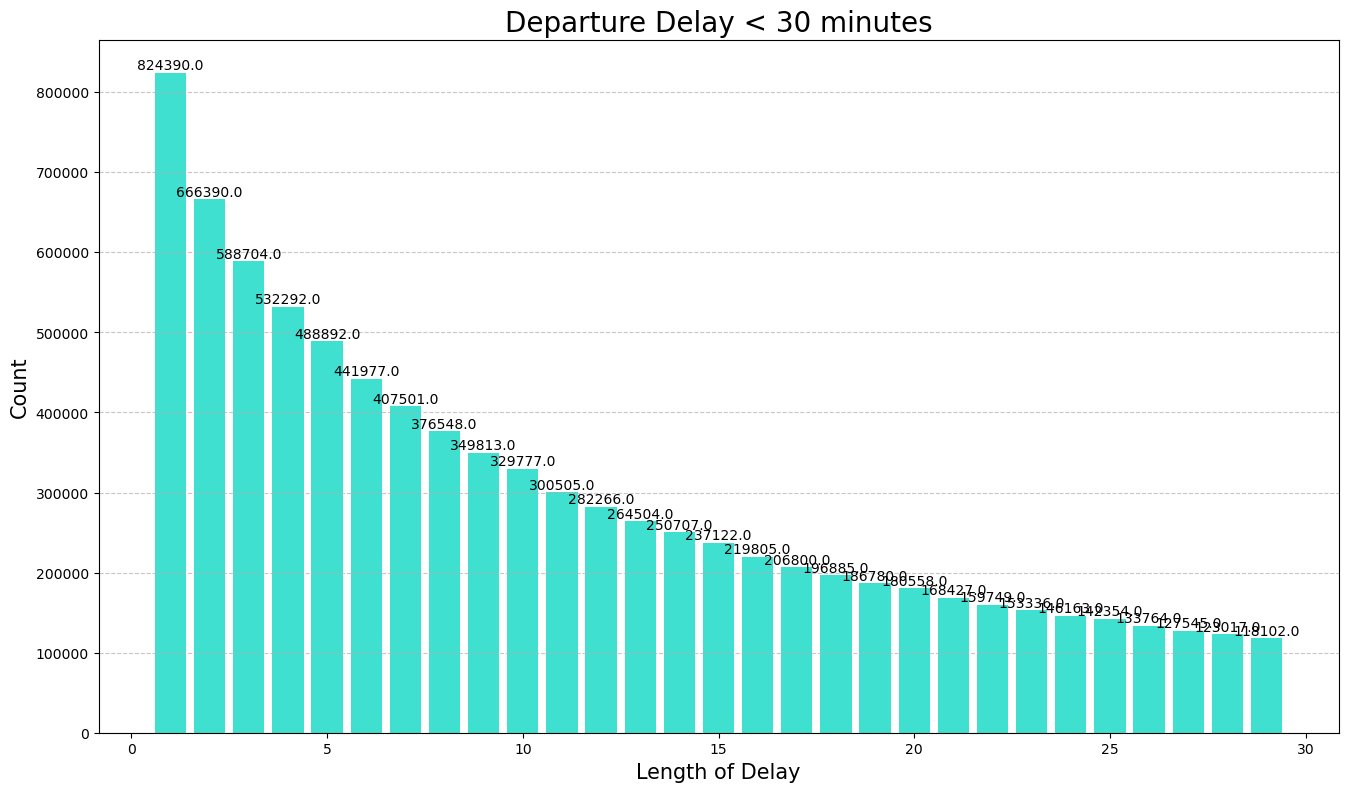

In [11]:
# Bar graph
plt.figure(figsize=(16, 9))
plt.bar(data=grouped_delay, x='DEP_DELAY', height='Count', color='turquoise')

# Title and axis labels
plt.title('Departure Delay < 30 minutes', fontsize=20)
plt.xlabel('Length of Delay', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Value labels above each bar
for index, row in grouped_delay.iterrows():
    plt.text(row['DEP_DELAY'], row['Count'], str(row['Count']), ha='center', va='bottom', fontsize=10)

plt.show()

In [12]:
df_merged["DelayGroup"] = None
df_merged.loc[df_merged["DEP_DELAY"] <= 0, "DelayGroup"] = "Early or On Time"
df_merged.loc[(df_merged["DEP_DELAY"] > 0) & (df_merged["DEP_DELAY"] <= 15), "DelayGroup"] = "Small Delay"
df_merged.loc[(df_merged["DEP_DELAY"] > 15) & (df_merged["DEP_DELAY"] <= 45), "DelayGroup"] = "Medium Delay"
df_merged.loc[df_merged["DEP_DELAY"] > 45, "DelayGroup"] = "Large Delay"
df_merged.loc[df_merged["CANCELLED"] == 1, "DelayGroup"] = "Cancelled"

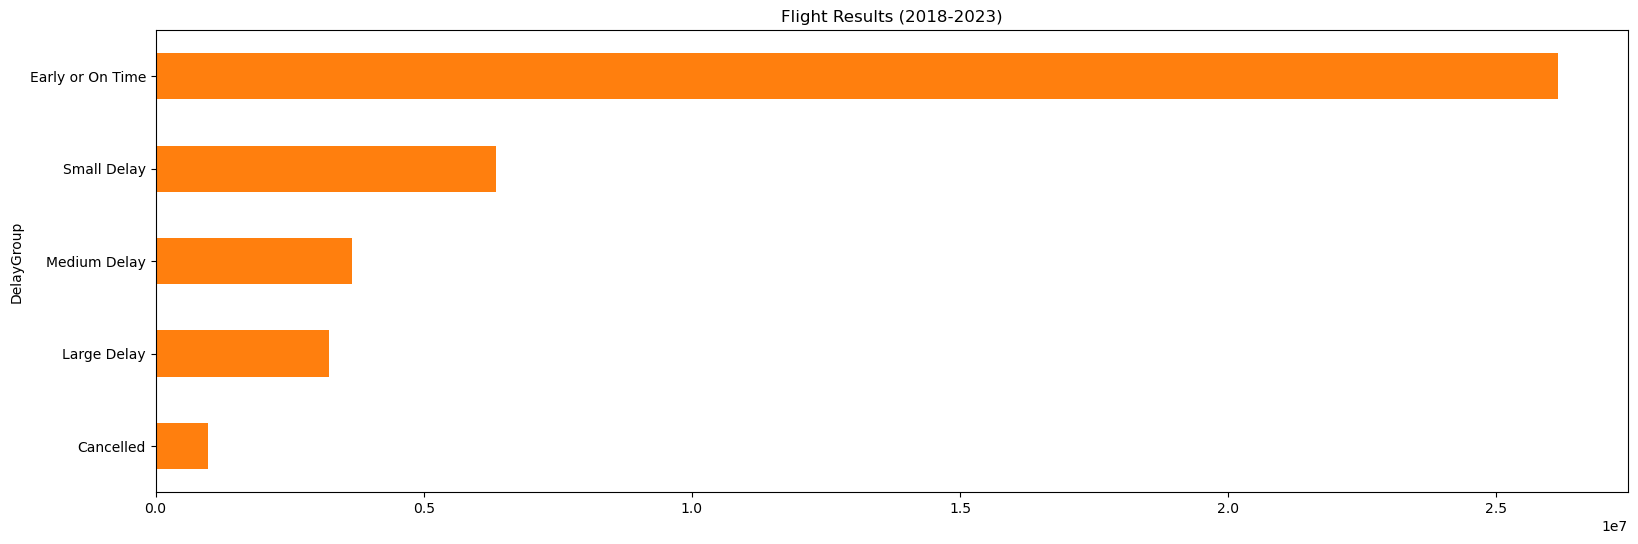

In [13]:
df_merged["DelayGroup"].value_counts(ascending=True).plot(
    kind="barh", figsize=(19, 6), color=pal[1], title="Flight Results (2018-2023)"
)
plt.show()

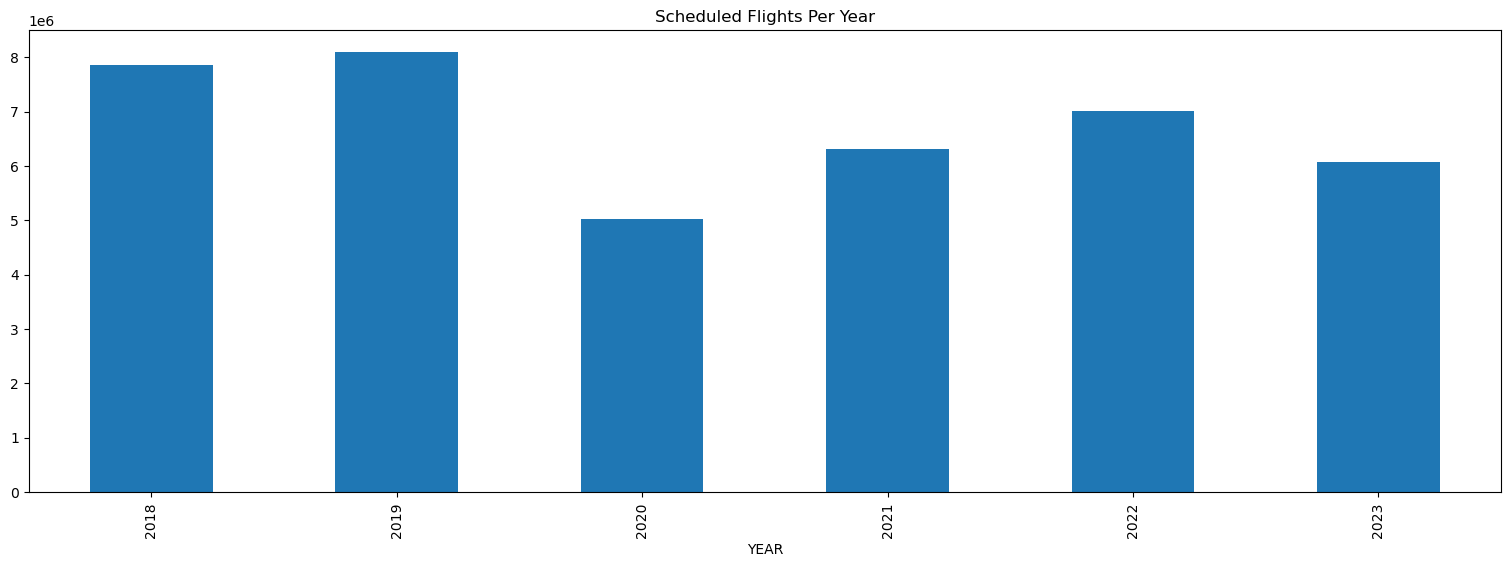

In [14]:
df_merged["YEAR"].value_counts().sort_index().plot(
    kind="bar", figsize=(19, 6), title="Scheduled Flights Per Year"
)
plt.show()

In [15]:
df_merged.shape

(40360864, 24)

In [16]:
df_merged.isnull().sum().sort_values(ascending=False)*100/40360864

CANCELLATION_CODE      97.569822
ARR_DELAY               2.669678
ARR_DEL15               2.669678
DEP_DELAY               2.376441
DEP_DEL15               2.376441
DelayGroup              0.001583
ORIGIN_CITY_NAME        0.000000
DEST                    0.000000
Description             0.000000
LATE_AIRCRAFT_DELAY     0.000000
SECURITY_DELAY          0.000000
NAS_DELAY               0.000000
WEATHER_DELAY           0.000000
CARRIER_DELAY           0.000000
DIVERTED                0.000000
DAY_OF_MONTH            0.000000
CANCELLED               0.000000
DAY_OF_WEEK             0.000000
MONTH                   0.000000
OP_UNIQUE_CARRIER       0.000000
ORIGIN                  0.000000
DEST_STATE_NM           0.000000
DEST_CITY_NAME          0.000000
YEAR                    0.000000
dtype: float64

In [17]:
#df_dropped = df_merged.dropna(subset=['ARR_DELAY', 'ARR_DEL15', 'DEP_DELAY', 'DEP_DEL15', 'DelayGroup'])
#df['ARR_DELAY'].fillna(df['ARR_DELAY'].median(), inplace=True)

In [18]:
#df_dropped.isnull().sum().sort_values(ascending=False)*100/40360864

In [19]:
#no dep_delay bc they were cancelled?
cancelled_flights = df_merged[df_merged['DelayGroup'] == 'Cancelled']
cancelled_flights.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_NM,DEP_DELAY,DEP_DEL15,ARR_DELAY,ARR_DEL15,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Description,DelayGroup
1330,2018,12,1,6,AA,JAX,"Jacksonville, FL",DFW,"Dallas/Fort Worth, TX",Texas,NaN,NaN,NaN,NaN,1.0,B,0.0,0.0,0.0,0.0,0.0,0.0,American Airlines,Cancelled
1620,2018,12,1,6,AA,MEM,"Memphis, TN",DFW,"Dallas/Fort Worth, TX",Texas,NaN,NaN,NaN,NaN,1.0,B,0.0,0.0,0.0,0.0,0.0,0.0,American Airlines,Cancelled
1823,2018,12,1,6,AA,ORD,"Chicago, IL",ATL,"Atlanta, GA",Georgia,NaN,NaN,NaN,NaN,1.0,B,0.0,0.0,0.0,0.0,0.0,0.0,American Airlines,Cancelled
1894,2018,12,1,6,AA,ORD,"Chicago, IL",MCI,"Kansas City, MO",Missouri,NaN,NaN,NaN,NaN,1.0,B,0.0,0.0,0.0,0.0,0.0,0.0,American Airlines,Cancelled
1925,2018,12,1,6,AA,ORD,"Chicago, IL",PHX,"Phoenix, AZ",Arizona,NaN,NaN,NaN,NaN,1.0,B,0.0,0.0,0.0,0.0,0.0,0.0,American Airlines,Cancelled


In [20]:
df_yr = df_merged.groupby("YEAR")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["Early or On Time", "Small Delay", "Medium Delay", "Large Delay", "Cancelled"]
df_yr[col_order].style.background_gradient(cmap="Greens")

DelayGroup,Early or On Time,Small Delay,Medium Delay,Large Delay,Cancelled
YEAR,,,,,
2018,64.830637,15.933267,9.224206,8.298180,1.713711
2019,64.619787,15.716778,9.081583,8.683248,1.898604
2020,76.052291,9.653418,4.572319,3.727722,5.994249
2021,65.698142,16.145308,8.917879,7.479795,1.758876
2022,59.723508,17.716455,10.719457,9.130980,2.709600
2023,60.567684,17.616822,10.750856,9.572584,1.492053


In [21]:
df_month = df_merged.groupby("MONTH")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["Early or On Time", "Small Delay", "Medium Delay", "Large Delay", "Cancelled"]
df_month[col_order].style.background_gradient(cmap="Blues")

DelayGroup,Early or On Time,Small Delay,Medium Delay,Large Delay,Cancelled
MONTH,,,,,
1,66.825469,14.522017,8.316177,7.491416,2.844920
2,65.160405,15.384744,8.880303,7.788854,2.785694
3,65.401361,14.890118,8.335007,6.706282,4.667233
4,63.887645,14.684724,8.400502,7.389021,5.638109
5,65.184606,16.303195,9.042541,7.859994,1.609664
6,58.953238,17.387546,10.942506,10.701730,2.014980
7,60.393639,16.609287,10.482943,10.665889,1.848242
8,62.960921,15.764529,9.752452,9.477220,2.044877
9,70.189639,14.410841,7.608803,6.401204,1.389513


In [22]:
df_2020 = (
    df_merged.query("YEAR != 2020")
    .groupby("MONTH")["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["Early or On Time", "Small Delay", "Medium Delay", "Large Delay", "Cancelled"]
df_2020[col_order].style.background_gradient(cmap="Blues")

DelayGroup,Early or On Time,Small Delay,Medium Delay,Large Delay,Cancelled
MONTH,,,,,
1,65.765985,14.595766,8.560286,7.859397,3.218565
2,63.635218,15.817127,9.294521,8.026842,3.226291
3,64.837064,16.548831,9.299773,7.471380,1.842952
4,65.107891,15.991192,9.177598,8.066515,1.656804
5,64.109034,16.898655,9.446817,8.230957,1.314538
6,57.093568,17.969794,11.489986,11.313195,2.133456
7,57.758525,17.541098,11.233217,11.499626,1.967535
8,60.368929,16.684805,10.499582,10.285184,2.161498
9,68.480883,15.090006,8.105621,6.859424,1.464067


In [23]:
df_3_4 = (
    df_merged.query("3 <= MONTH <= 4")
    .groupby("YEAR")["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["Early or On Time", "Small Delay", "Medium Delay", "Large Delay", "Cancelled"]
df_3_4[col_order].style.background_gradient(cmap="Oranges", axis=0)

DelayGroup,Early or On Time,Small Delay,Medium Delay,Large Delay,Cancelled
YEAR,,,,,
2018,66.124296,16.163578,8.808263,6.883017,2.020847
2019,65.790141,15.462990,8.614418,7.974924,2.157527
2020,63.063286,6.202543,3.291875,2.733237,24.709059
2021,76.291254,13.015721,5.715776,4.077733,0.899516
2022,59.301505,18.234213,11.096981,9.445164,1.922137
2023,59.494274,17.931421,11.346514,9.729741,1.498050


In [24]:
# Reset Description categories
df_merged["Description"] = df_merged["Description"].astype("str").astype("category")

# Count the instances of each airline
airline_counts = df_merged["Description"].value_counts()

# Display the counts
print('Total Airline Flights \n', airline_counts, '\n')

Total Airline Flights 
 Description
Southwest Airlines Co.                  7237754
Delta Air Lines                         4987150
American Airlines                       4832660
SkyWest Airlines                        4257156
United Air Lines                        3243473
Republic Airline                        1767251
Envoy Air                               1525800
JetBlue Airways                         1454517
Endeavor Air                            1381912
PSA Airlines                            1358980
Alaska Airlines                         1272832
Spirit Air Lines                        1158010
Mesa Airlines                            926756
Frontier Airlines                        785314
Allegiant Air                            629892
Horizon Air                              588234
Piedmont Airlines                        560751
Air Wisconsin Airlines Corp              458667
Hawaiian Airlines                        402839
ExpressJet Airlines  d/b/a aha!          389187
GoJe

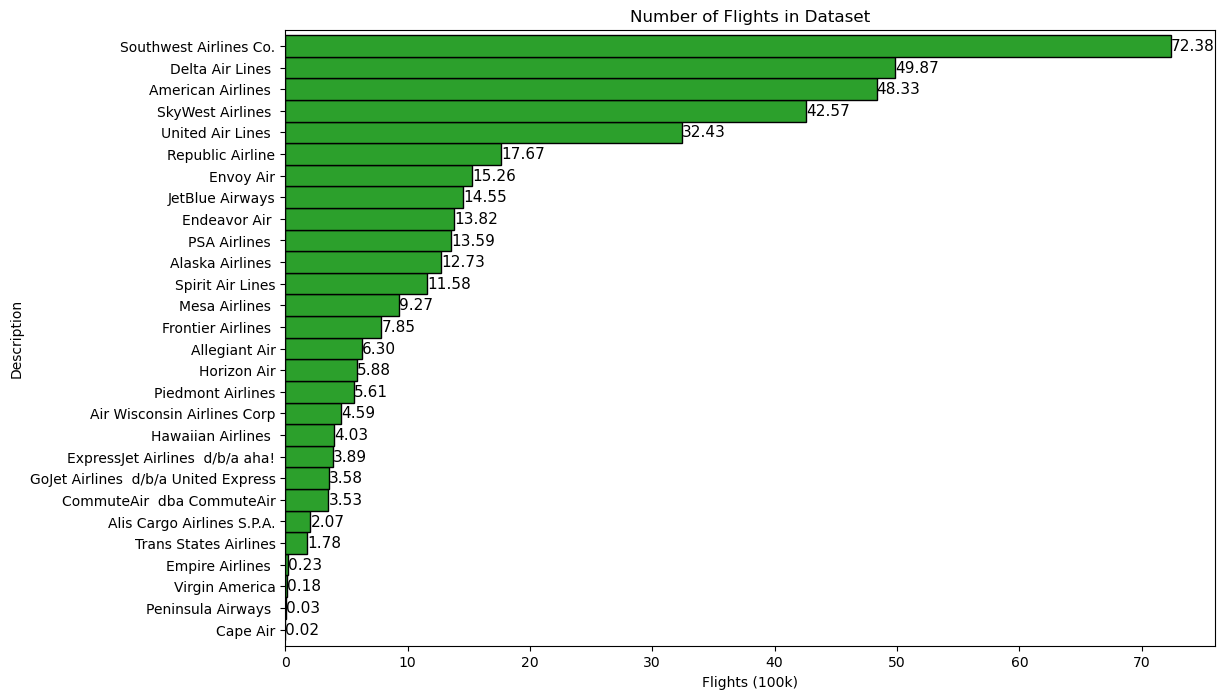

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))

# Create a horizontal bar plot
airlines_ordered = (df_merged["Description"].value_counts(ascending=True) / 100_000).plot(
    kind="barh", ax=ax, color=pal[2], width=1, edgecolor="black"
)

# Add count labels next to each bar
for bar in airlines_ordered.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():,.2f}',
             va='center', ha='left', fontsize=11)

ax.set_title("Number of Flights in Dataset")
ax.set_xlabel("Flights (100k)")
plt.show()

In [26]:
# Group by airline and delay group, calculate the normalized counts
df_agg = (
    df_merged.groupby(["Description", "DelayGroup"])
    .size()
    .unstack()
    .fillna(0)
    .apply(lambda x: x / x.sum(), axis=1)
)

# Count the instances of each airline
airline_counts = df_merged["Description"].value_counts()

# Filter airlines with at least 400,000 flights
filtered_airlines = airline_counts[airline_counts >= 400000].index

# Filter the DataFrame based on selected airlines
df_filtered = df_merged[df_merged["Description"].isin(filtered_airlines)]

In [27]:
# Group by airline and delay group, calculate the normalized counts again
df_agg = (
    df_filtered.groupby(["Description", "DelayGroup"])
    .size()
    .unstack()
    .fillna(0)
    .apply(lambda x: x / x.sum(), axis=1)
)

# Sort the airlines based on total flights
df_agg_sorted = df_agg.loc[airline_counts.loc[filtered_airlines].sort_values(ascending=True).index]

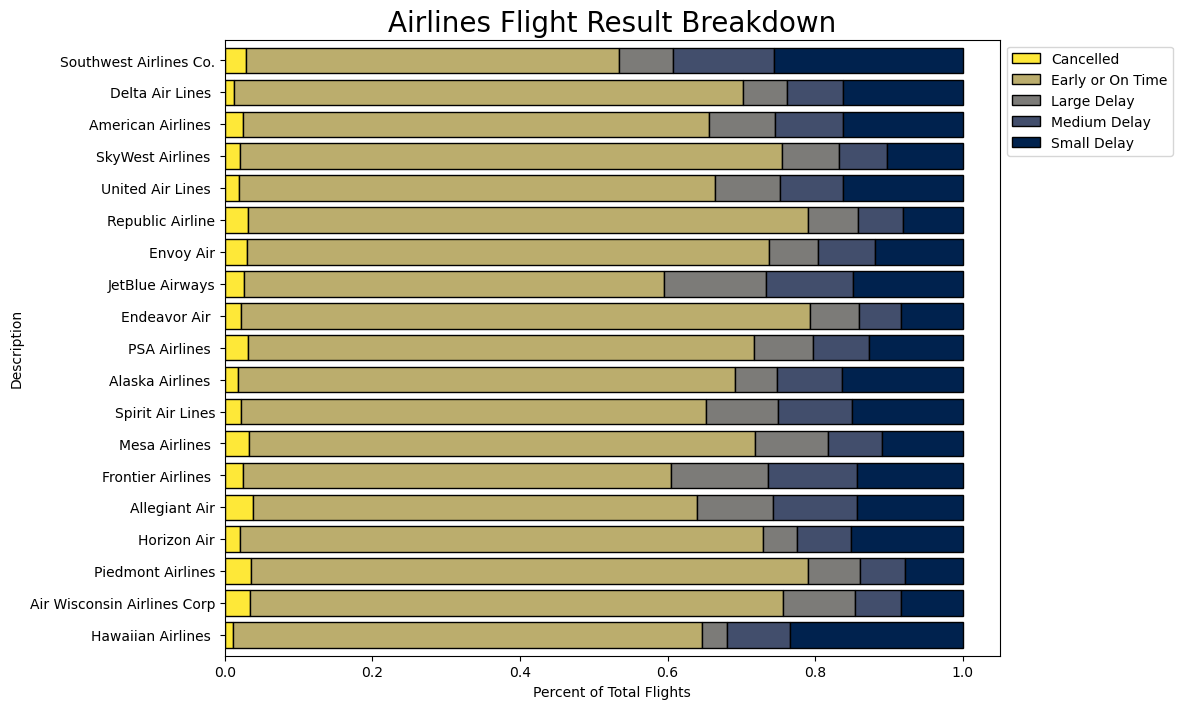

In [28]:
# Choose a colormap (e.g., 'viridis')
cmap = plt.get_cmap('cividis_r')

# Create the stacked bar plot with colormap
fig, ax = plt.subplots(figsize=(10, 8))
df_agg_sorted.plot(kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black", colormap=cmap)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Airlines Flight Result Breakdown", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

In [29]:
delay_mapping = {
    "Early or On Time": "Good",
    "Small Delay": "Good",
    "Medium Delay": "Bad",
    "Large Delay": "Bad",
    "Cancelled": "Bad",
}

In [30]:
df_merged["DelayOk"] = df_merged["DelayGroup"].map(delay_mapping)

In [31]:
# Count the instances of each airline
airline_counts = df_merged["Description"].value_counts()

# Filter airlines with at least 400,000 flights
filtered_airlines = airline_counts[airline_counts >= 400000].index

# Filter the DataFrame based on selected airlines
df_filtered = df_merged[df_merged["Description"].isin(filtered_airlines)]

In [32]:
# Group by airline and delay group, calculate the normalized counts again
df_agg = (
    df_filtered.groupby(["Description"])["DelayOk"]
    .value_counts(normalize=True)
    .unstack()[["Good", "Bad"]]
)

# Count the instances of each airline
airline_counts = df_filtered["Description"].value_counts()

# Filter airlines with at least 400,000 flights
filtered_airlines = airline_counts[airline_counts >= 400000].index

# Sort the airlines based on the most "Good" delays
df_agg_sorted = df_agg.loc[filtered_airlines].sort_values(by="Good", ascending=True)

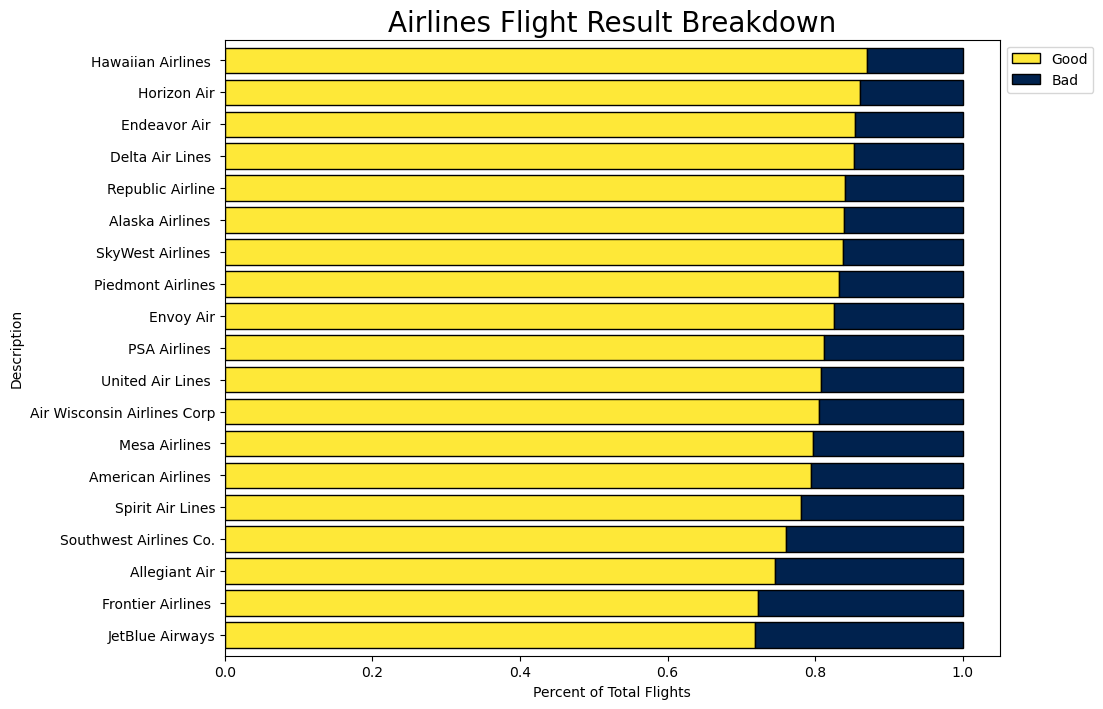

In [33]:
# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(10, 8))
df_agg_sorted.plot(kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black", colormap=cmap)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Airlines Flight Result Breakdown", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

In [34]:
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

In [35]:
# Creation of a dataframe with statitical infos on each airline:
global_stats = df_merged['DEP_DELAY'].groupby(df_merged['Description']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('mean', ascending = False)
global_stats

,min,max,count,mean
Description,,,,
Peninsula Airways,-44.0,470.0,2734.0,19.192026
JetBlue Airways,-73.0,2508.0,1418093.0,17.948431
Trans States Airlines,-51.0,1840.0,170680.0,17.068749
CommuteAir dba CommuteAir,-68.0,1557.0,340759.0,16.483661
Frontier Airlines,-60.0,1393.0,766541.0,16.402543
Allegiant Air,-66.0,2065.0,605689.0,13.493750
Mesa Airlines,-58.0,2209.0,897501.0,13.097392
Spirit Air Lines,-52.0,1587.0,1133324.0,12.514504
ExpressJet Airlines d/b/a aha!,-54.0,1839.0,374375.0,12.430178


C:\Users\cj.alonzo\AppData\Local\Temp\ipykernel_2588\310370192.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax3 = sns.stripplot(y="Description", x="DEP_DELAY", size=4, palette=colors,


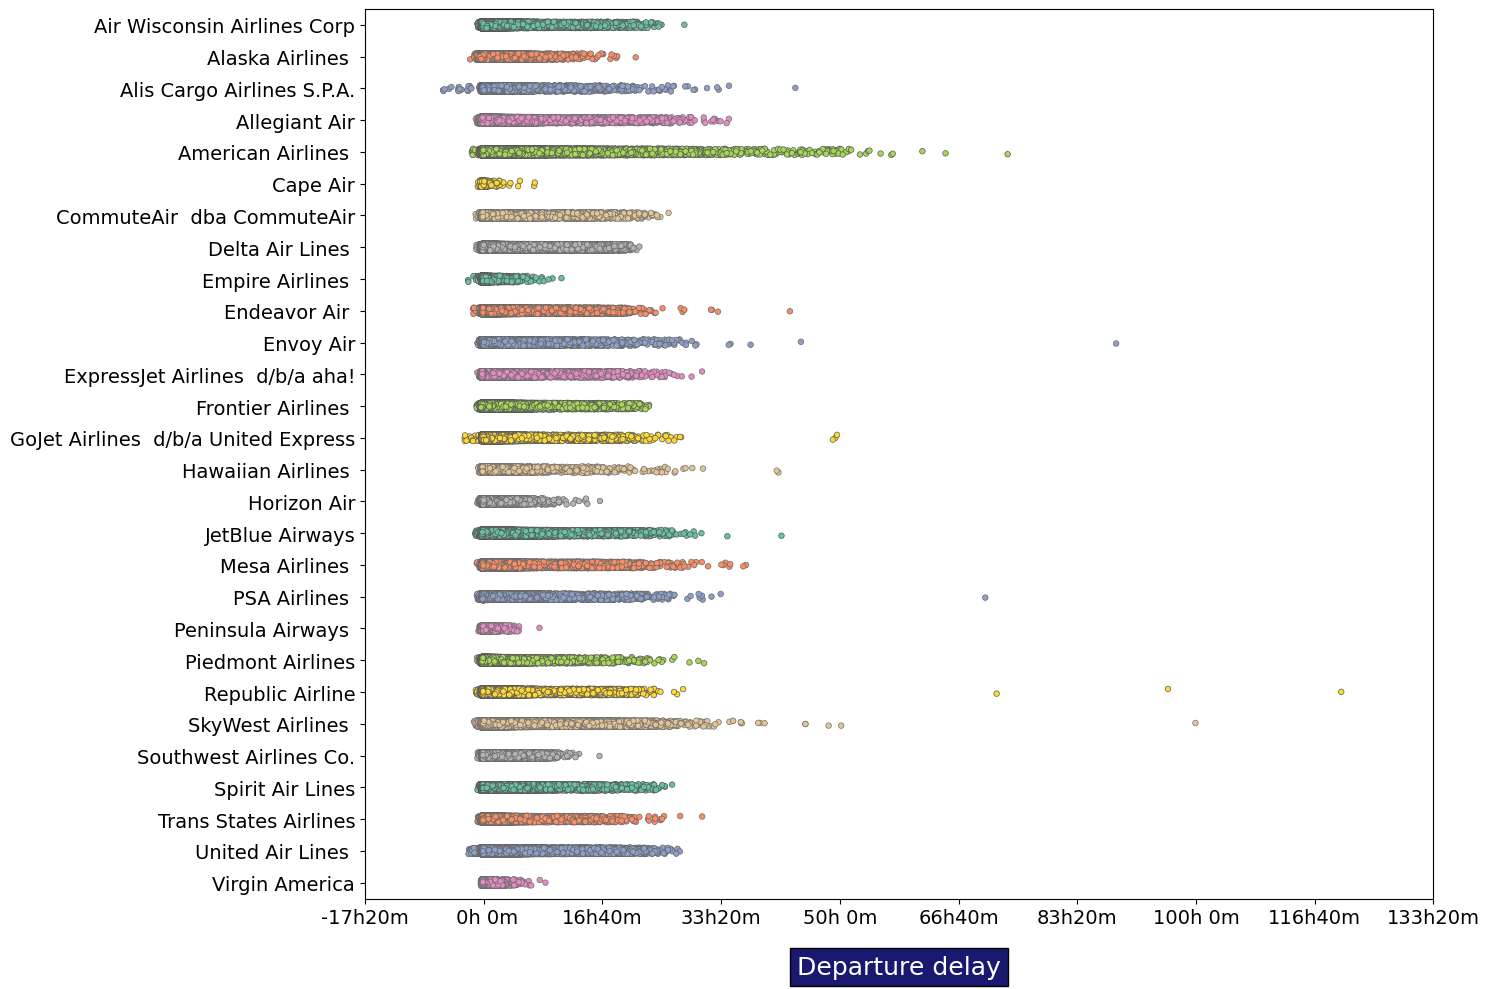

In [36]:
# Striplot
colors = sns.color_palette("Set2", n_colors=28)

plt.figure(figsize=(15, 10))

ax3 = sns.stripplot(y="Description", x="DEP_DELAY", size=4, palette=colors,
                    data=df_merged, linewidth=0.5, jitter=True)

plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticks(ax3.get_xticks())
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*divmod(x, 60)) for x in ax3.get_xticks()],
                    fontsize=14)

plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor': 'midnightblue', 'pad': 5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)

plt.tight_layout(w_pad=3)
plt.show()

In [37]:
print("Number of airports: {}".format(len(df_merged['ORIGIN'].unique())))

Number of airports: 389


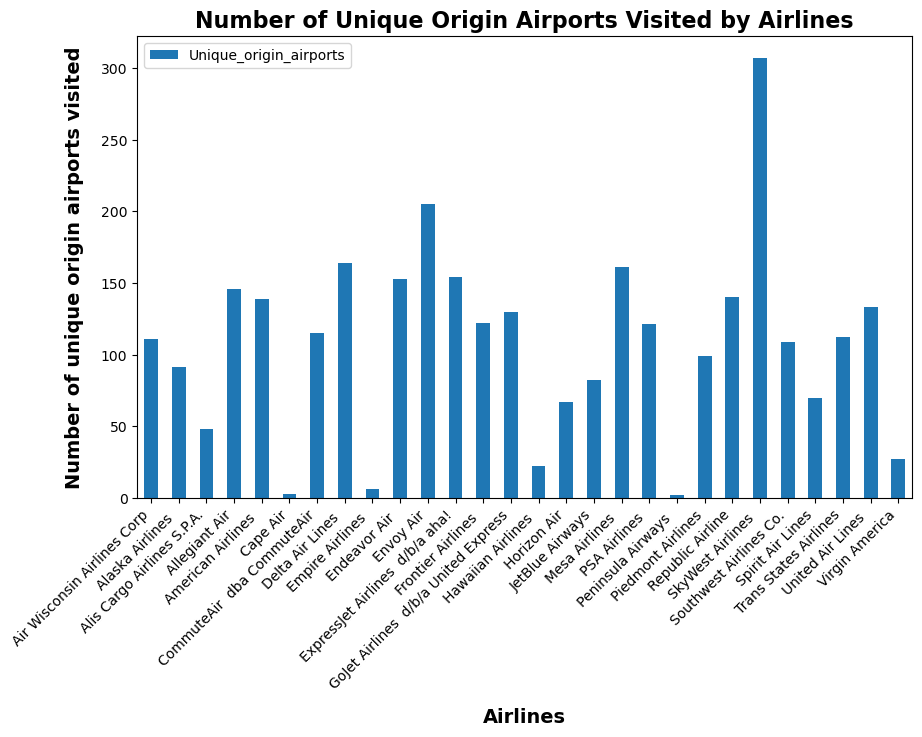

In [38]:
# Count the number of unique origin airports visited per airline
unique_origin_airports = df_merged.groupby('Description')['ORIGIN'].nunique().reset_index()

# Rename the column for clarity
unique_origin_airports.rename(columns={'ORIGIN': 'Unique_origin_airports'}, inplace=True)

# Plot the bar chart
ax = unique_origin_airports.set_index('Description').plot(kind='bar', figsize=(10, 6))

# Set labels and title
plt.ylabel('Number of unique origin airports visited', fontsize=14, weight='bold', labelpad=12)
plt.xlabel('Airlines', fontsize=14, weight='bold', labelpad=12)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Unique Origin Airports Visited by Airlines', fontsize=16, weight='bold')

plt.show()

In [39]:
# Define a function to calculate statistics
def get_stats(x):
    return pd.Series({
        'min': x.min(),
        'max': x.max(),
        'count': x.count(),
        'mean': x.mean()
    })

# Calculate statistics for mean delays per airport
airport_stats = df_merged['DEP_DELAY'].groupby(df_merged['ORIGIN_CITY_NAME']).apply(get_stats).unstack()

# Sort the statistics by count in descending order
airport_stats = airport_stats.sort_values('mean', ascending=False)

# Display the statistics
print(airport_stats)

                         min     max   count       mean
ORIGIN_CITY_NAME                                       
Youngstown/Warren, OH   15.0   111.0     2.0  63.000000
Pago Pago, TT          -37.0  2468.0   437.0  39.766590
Bishop, CA             -23.0  1207.0   565.0  30.776991
Hyannis, MA            -23.0   468.0   614.0  25.654723
Mammoth Lakes, CA      -23.0  1260.0  1175.0  23.119149
...                      ...     ...     ...        ...
Yakutat, AK            -73.0   645.0  4054.0  -3.911199
Nome, AK              -114.0   438.0  3605.0  -4.886269
Gustavus, AK           -40.0   141.0   508.0  -6.700787
Deadhorse, AK          -46.0   434.0  3702.0  -7.463533
Rota, TT               -35.0    50.0   151.0  -7.993377

[381 rows x 4 columns]


In [40]:
df_merged.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_NM,DEP_DELAY,DEP_DEL15,ARR_DELAY,ARR_DEL15,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Description,DelayGroup,DelayOk
0,2018,12,1,6,9E,AEX,"Alexandria, LA",ATL,"Atlanta, GA",Georgia,-5.0,0.0,-14.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Endeavor Air,Early or On Time,Good
1,2018,12,1,6,9E,AEX,"Alexandria, LA",ATL,"Atlanta, GA",Georgia,0.0,0.0,9.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Endeavor Air,Early or On Time,Good
2,2018,12,1,6,9E,AGS,"Augusta, GA",ATL,"Atlanta, GA",Georgia,-10.0,0.0,-20.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Endeavor Air,Early or On Time,Good
3,2018,12,1,6,9E,AGS,"Augusta, GA",ATL,"Atlanta, GA",Georgia,-10.0,0.0,-1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Endeavor Air,Early or On Time,Good
4,2018,12,1,6,9E,AGS,"Augusta, GA",ATL,"Atlanta, GA",Georgia,1.0,0.0,3.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Endeavor Air,Small Delay,Good


In [41]:
# Prepare the features
features = ['ORIGIN', 'ORIGIN_CITY_NAME', 'DEST', 'DEST_CITY_NAME', 'Description', 'DelayGroup', 'YEAR', 'DAY_OF_WEEK', 'MONTH']
X = df_merged[features].copy()  # Create a copy to avoid SettingWithCopyWarning

# Label Encoding for categorical features
label_encoders = {}
for feature in ['ORIGIN', 'ORIGIN_CITY_NAME', 'DEST', 'DEST_CITY_NAME', 'Description', 'DelayGroup']:
    le = LabelEncoder()
    X.loc[:, feature] = le.fit_transform(X[feature])  # Use .loc to avoid SettingWithCopyWarning
    label_encoders[feature] = le

In [42]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
# Prepare the target variable
y = df_merged['DEP_DEL15']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [44]:
# Find indices of rows with missing values in X_train
missing_indices = np.isnan(X_train).any(axis=1)

# Remove corresponding rows from X_train and y_train
X_train = X_train[~missing_indices]
y_train = y_train[~missing_indices]

In [45]:
# Find indices of rows with missing target values
nan_indices = np.isnan(y_train)

# Remove rows with missing target values from X_train and y_train
X_train = X_train[~nan_indices]
y_train = y_train[~nan_indices]

# Initialize and train the XGBoost classifier
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [46]:
# Drop rows with missing values in y_test
X_test = X_test[~np.isnan(y_test)]
y_test = y_test[~np.isnan(y_test)]

# Make predictions
y_pred = xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9937607291399125
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00   6452868
         1.0       1.00      0.97      0.98   1427540

    accuracy                           0.99   7880408
   macro avg       1.00      0.98      0.99   7880408
weighted avg       0.99      0.99      0.99   7880408

